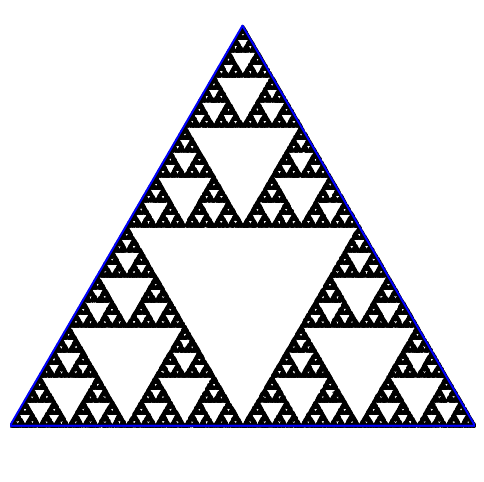

In [14]:
import numpy as np
import matplotlib.pyplot as plt

max_iters = 100000; # basically, dots to draw
l = 1000;      # length of triangle edge

# create the triangle
a = np.array([0, 0])
b = np.array([l, 0])
c = np.array([l/2, np.sqrt((l)**2 - (l/2)**2)])
T = np.array([a,b,c,a])

# select a random point in the triangle
go = 1
m = c[1]/c[0]
while ~go:
    rx = np.random.uniform(0,l)
    ry = np.random.uniform(0,c[1])

    if rx<=l/2:
        go = (ry<m*rx)
    else:
        go = (ry<-m*(rx-l/2)+c[1])
#print('starting point is at ' + str(np.round(rx)) +', '+ str(np.round(ry)))

# initialize and update the output
A = np.zeros([max_iters,2])
A[0,:] = [rx,ry]

# loop through 
for k in range(1,max_iters):
    # pick a random vertex
    vi = np.random.randint(0,2+1)
    # find its location
    v = T[vi,:]
    # split the difference between the random point and the vertex
    newp = np.array([(rx-(rx-v[0])/2) , (ry-(ry-v[1])/2)])
    # update the rx and ry
    rx = newp[0]
    ry = newp[1]
    # save to array
    A[k,:] = newp
    
### plot the triangle ###
plt.figure(figsize=(6, 6))
plt.plot(T[:,0],T[:,1],'b-')
# set the x and y axis limits
plt.xlim(-l*0.0, l*1.0)
plt.ylim(-l*0.0-0.1*l, l*1.0-0.1*l)
#plt.title('Iterations = ' + str(max_iters))
plt.xticks([])
plt.yticks([])
# Get the current axes object
ax = plt.gca()
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.scatter(A[:,0],A[:,1],marker='.',s=1,color='black');  

# Save the plot as a PNG image
plt.savefig('examplefig.png', dpi=300, bbox_inches='tight')